In [3]:
library(astsa)

# Problems, *Shumway and Stoeffer*

## Problem 2.8

The glacial varve plotted below exhibits some nonstationarity that can be imporved by transforming to logarithms and some additonal nonstationarity that can be corrected by differencing the logarithms.

 * Argue that the glacial varves series, say $x_t$ exhibits heteroscedasticity by computing the sample variance over the first half and the second half of the data. Argue that the transformation $y_t = \log x_t$ stabilizes the variance over the series. Plot the histograms of $x_t$ and $y_t$ to see whether the apporximation to normality is improved by transforming the data.
 * Plot the series $y_t$. Do any time intervals, of the order 100 years, exist where one can observe behavior comparable to that observed in the global temperature records in figure 1.2?
 * Examine the sample ACF of $y_t$ and comment.
 * Computer the difference $u_t=y_t-y_{t-1}$, examine its time plot and sample ACF, and argue that differencing the logged varve data produces a reasonable stationary series. Can you think of a practical interpretation for $u_t$?
 * Based on the samples ACF of the differenced transformed series computer in (c), argue that a generalization of the model given by example 1.26 might be reasonable. Assume $$u_t = \mu +w_t+\theta w_{t-1}$$ is stationary when the inputs $w_t$ are assumed independent with mean 0 and variance $\sigma_w^2.$ Show that $$\gamma_u(h) = \begin{cases} \sigma_w^2(1+\theta^2) & \text{if } h= 0,\\ \theta \sigma_w^2 & \text{if } h = \pm1,\\ 0 & \text{if } |h|>1. \end{cases}$$
* Based on part (e), use $\hat \rho_u(1)$ and the estimate of the variance of $u_t, \hat\gamma_u(0)$, to derive estimates of $\theta$ and $\sigma_w^2.$ This is an application of the method of moments from classical statistics, where estimators of the parameters are derived by equating sample moments to theoretical moments. 

-----------------------

A plot of the varves follows below:

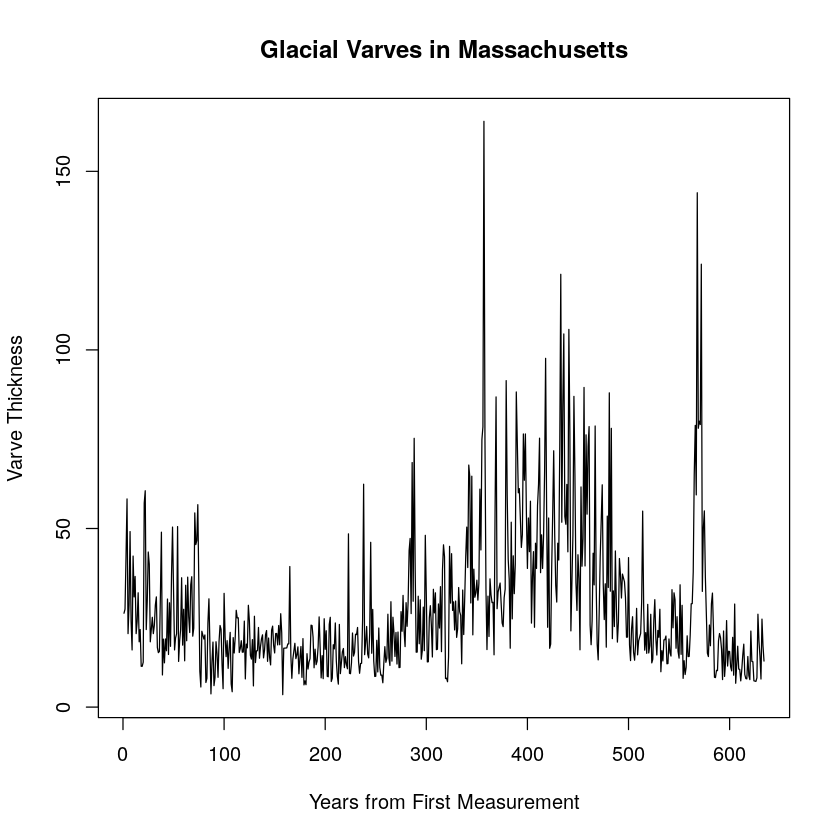

In [4]:
plot(varve, main="Glacial Varves in Massachusetts", xlab="Years from First Measurement", ylab="Varve Thickness")

We claim that $x_t$ is heteroscedastic as follows:

In [7]:
var(varve[1:length(varve)*.5]); var(varve[(length(varve)*.5+1):length(varve)])

[1] 132.501

[1] 594.4904

So that the variances are substantiall different. If let let $y_t = \log(x_t)$, we obtain:

[1] 0.269403

[1] 0.451371

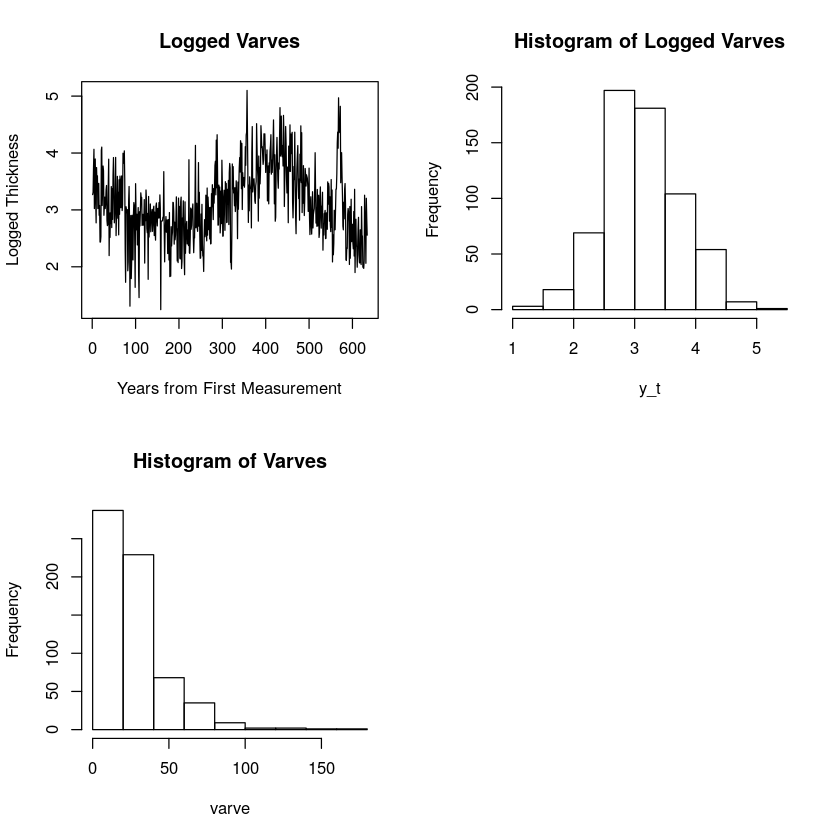

In [10]:
y_t=log(varve)
par(mfrow=c(2,2))
plot(y_t, main="Logged Varves", xlab="Years from First Measurement", ylab="Logged Thickness")
hist(y_t, main="Histogram of Logged Varves")
hist(varve, main="Histogram of Varves")
var(y_t[1:length(y_t)*.5]); var(y_t[(length(y_t)*.5+1):length(y_t)])

Thus, visually and numerically, it does appear that the variance over the series is substantially closer. It also appears that the histogram is more normal. The gloabl temperature graph of figure 1.2 is:

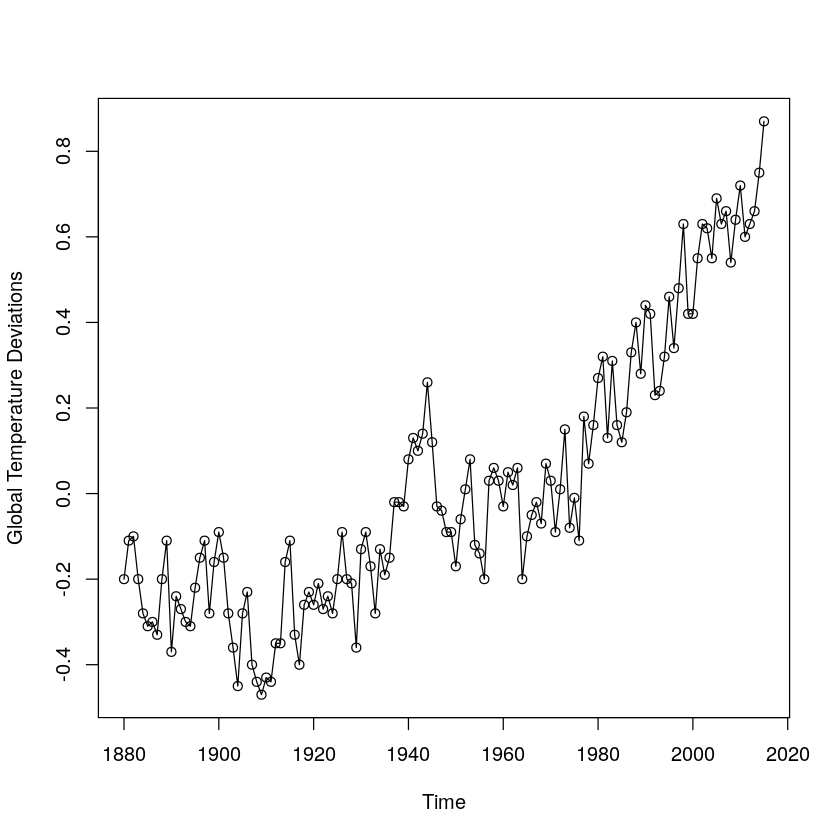

In [11]:
plot(globtemp, type="o", ylab="Global Temperature Deviations")

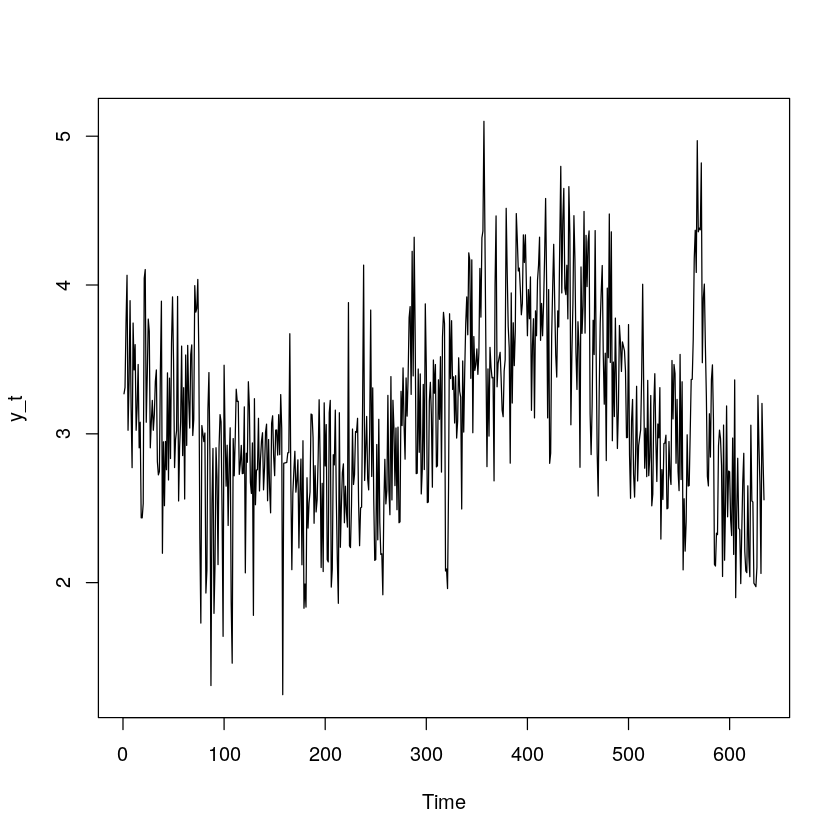

In [13]:
plot(y_t)

I would say that between year 300 and 400, we see the same sort of behavior as in the global temperature graph: some small flucuations at a reasonably local minimum, followed by a brief dip to the global minimum, then a spike to local maximum, followed by a drop to a local minimum higher than the first, followed by a spike to the global maximum.

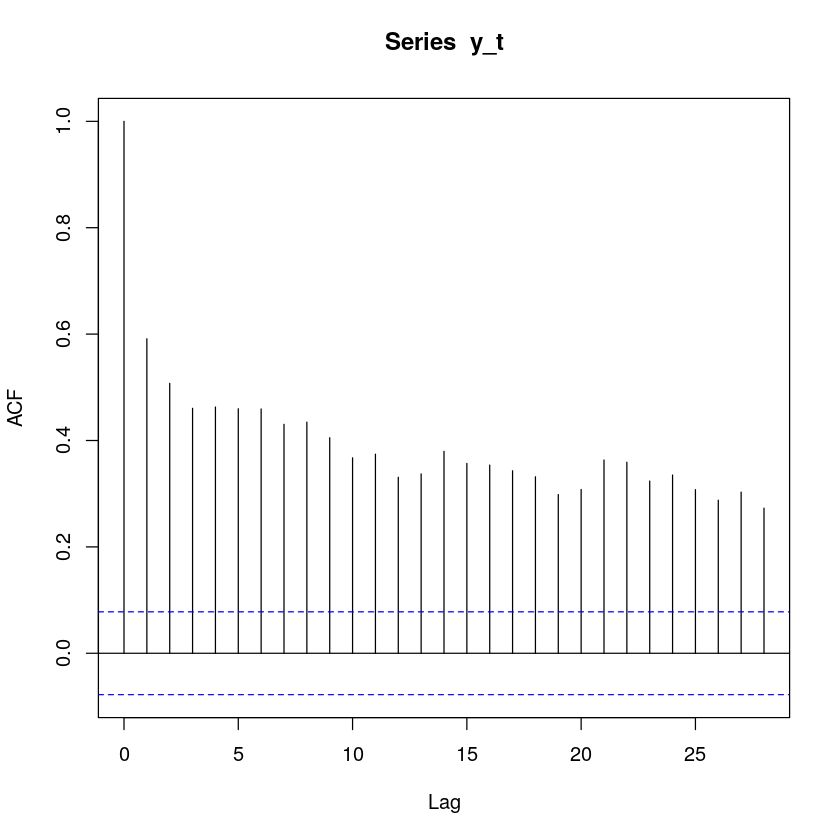

In [16]:
acf(y_t)

From the sample ACF, we see that there is a lot of correlation in this series, with some periodicity in respect to the level; i.e., we see dips as years 11 and 19, and peacks at years 14 and 21.

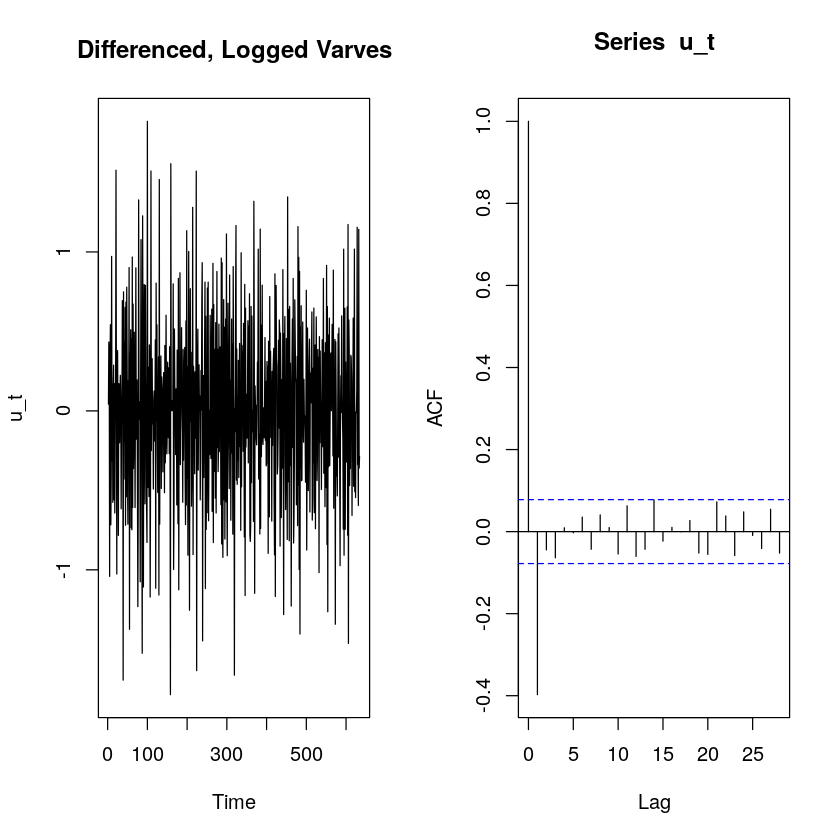

In [20]:
u_t = diff(y_t, lag=1, differences=1)
par(mfrow=c(1,2))
plot(u_t, main="Differenced, Logged Varves")
acf(u_t)

The mean of $u_t$ certainly looks relatively constant, and the variance doesn't seem that wild. There are only two statistically significant peaks on the ACF plot, so $u_t$ does indeed seem reasonable stationary.


If we let $u_t =\mu+w_t+\theta w_{t-1}$, then we will have $E[u_t]=\mu$, and thus

$$\begin{align}
\gamma_u(h) &= E[(u_t-\mu)(u_{t+h}-\mu)]\\
&=E[(\mu+w_t+\theta w_{t-1}-\mu)(\mu+w_{t+h}+\theta w_{t+h-1} - \mu)]\\
&=E[(w_t+\theta w_{t-1})(w_{t+h}+\theta w_{t+h-1})]\\
&=E[w_tw_{t+h}] +\theta E[w_{t-1}w_{t+h}] + \theta E[w_tw_{t+h-1}]+\theta^2 E[w_{t-1}w_{t+h-1}]
\end{align}$$

so that if $h=0,$ we have 

$$\begin{align}
\gamma_u(0) &= \sigma_w^2 + \theta^2\sigma^2\\
&=\sigma_w^2(1+\theta^2)
\end{align}$$



and if $h = \pm 1$, we have that either $t-1 = t+h$ or $t=t+h-1$, so that either way we obtain 

$$\gamma_u (\pm 1) = \theta \sigma^2 $$

and obviously $\gamma_u(h)=0$ for $|h|>1$, since the white noise is uncorrelated.

*The logged difference of a time series gives you a percentage change.*

In [25]:
acf(u_t,plot=FALSE); var(u_t)


Autocorrelations of series ‘u_t’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.397 -0.044 -0.064  0.009 -0.003  0.035 -0.043  0.041  0.010 -0.054 
    11     12     13     14     15     16     17     18     19     20     21 
 0.063 -0.060 -0.043  0.077 -0.023  0.010  0.000  0.027 -0.052 -0.056  0.072 
    22     23     24     25     26     27     28 
 0.038 -0.058  0.048 -0.009 -0.041  0.054 -0.052 

[1] 0.3322131

From the above, we see that the autocorrelation at 1 is $$\hat \rho_u(1) = \theta =-0.397$$, and the variance of $u_t$ is 0.33221. This means that

$$ \sigma_w^2(1+(-0.397)^2)=0.33221.$$

In [27]:
0.33221/(1+(-0.397)^2)

[1] 0.2869795

So that $\sigma_w^2\approx 0.2870$. 






## Problem 2.10
________________

Consider the two weekly time series `oil` and `gas`. The oil series is in dolllars per barrel, while the gas series is in center per gallon.

 * Plot the data on the same graph. Which of the simulated series displayed in section 1.2 do these series most resemble? Do you believe the series are stationary?
 * In economics, it is often the percentage change in price (termed *growth rate* or *return*), rather than the absolute price change, that is important. Argue that a transformation of the form $y_t = \nabla \log x_t$ might be applied to the data, where $x_t$ is the oil or gas price series.
 * Transform the data as described in part (b), plot the data on the same graph, look at the sample ACFs of the transformed ddata, and comment.
 * Plot the CCF of the transformed data and comment. The small, but significant values when gas leads oil might be considered as feedback.
 * Exhibit scatterplots of the oil and gas growth rate series for up to three weeks of lead time of oil pricesl include a nonparametric smoother in each plot and comment on the results (e.g., are there outliers? are the relationships linear?).
 * There have been a number of studies questioning whether gasoline prices respond more quickly when oil prices are rising than when oil prices are falling ("asymmetry"). We will attempt to explore this question here with simpled lagged regression; we will ignore some obvious problems such as outliers and autocorrelated errors, so this will not be a definitive analysis. Let $G_t$ and $O_t$ denote the gas and oil growth rates.
     * Fit the regression and comment on the results
         $$ G_t = \alpha_1+\alpha_2I_t + \beta_1O_t+\beta_2O_{t-1} + w_t$$
         where $I_t=1$ is $O_t \geq 0$ and 0 otherwise ($I_t$ is the indicator of no growth or positive growth in oil price). *Hint:*
         
         ```
         poil = diff(log(oil))
         pgas = diff(log(gas))
         indi = ifelse(poil < 0, 0, 1)
         mess = ts.intersect(pgass, poil, poilL = lag(poil, -1), indi)
         summary(fit <- lm(pgas ~ poil + poilL +indi , data = mess))
         ```
         
     * What is the fitted model when there is negative growth in oil price at time $t$? What is the fitted model when there is no or positive growth in oil price? Do there results support the asymmetry hypothesis?
     * Analyze the residuals from the fit and comment?
       

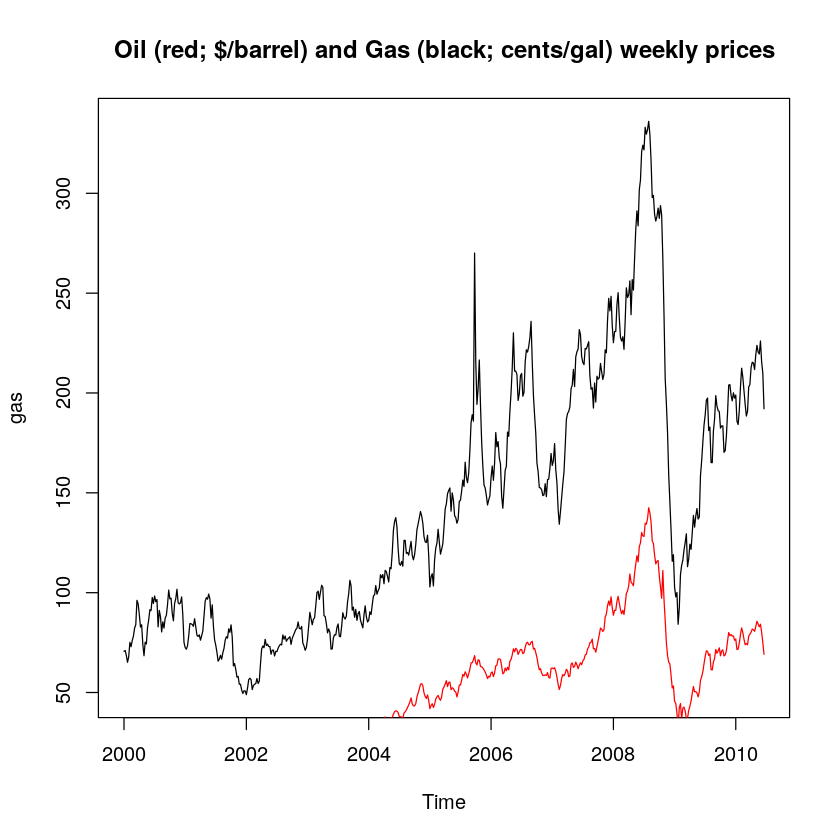

In [41]:
plot(gas, main = "Oil (red; $/barrel) and Gas (black; cents/gal) weekly prices")
lines(oil, col='red')

This looks like a random walk with drift, i.e. 

$$x_t = \delta + x_{t-1} + w_t.$$

It certainly does not look stationary. The mean is not constant.

From footnote 2, we have that $\log(1+p) \approx p$ for $p$ near 0. Thus, if $\log x_{t-1}$ increases by a small percentage $r$ when time is increased by 1 unit, we will have

$$\log (x_{t-1}(1+r)) = \log x_{t-1} + \log(1+r) \approx \log x_{t-1} + r.$$

Thus, a reasonable small change in the log of a variable corresponds to a reasonable small percentage change in the variable itself. 

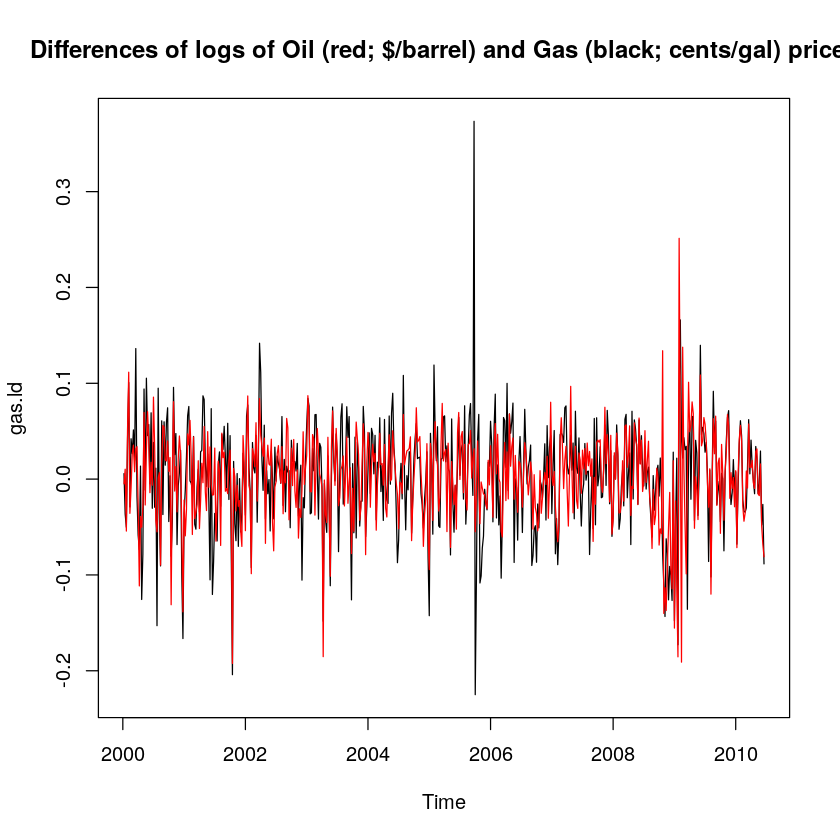

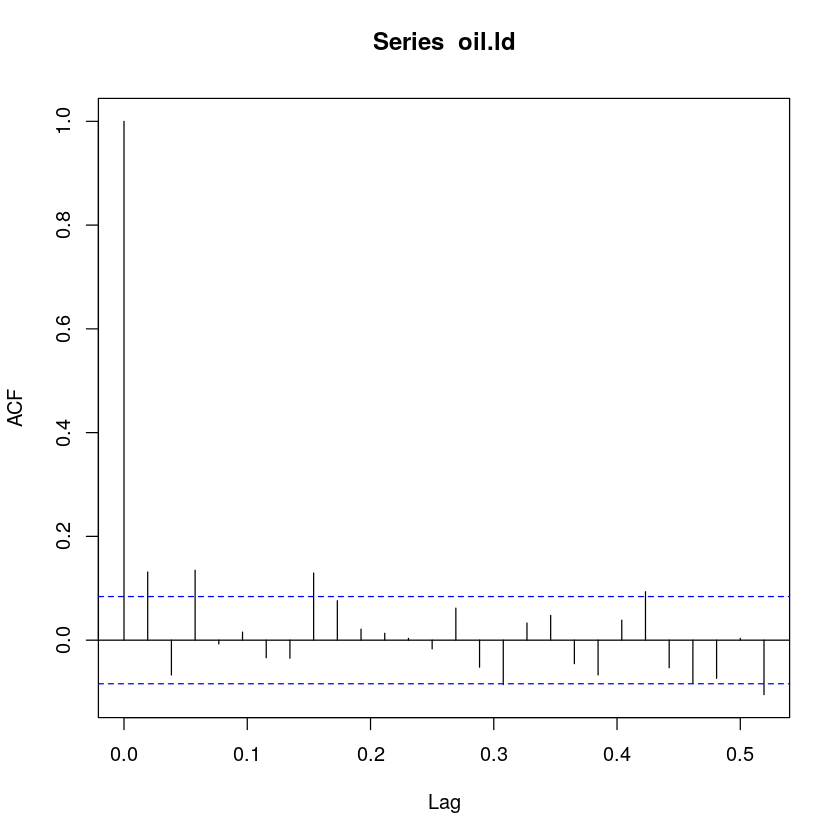

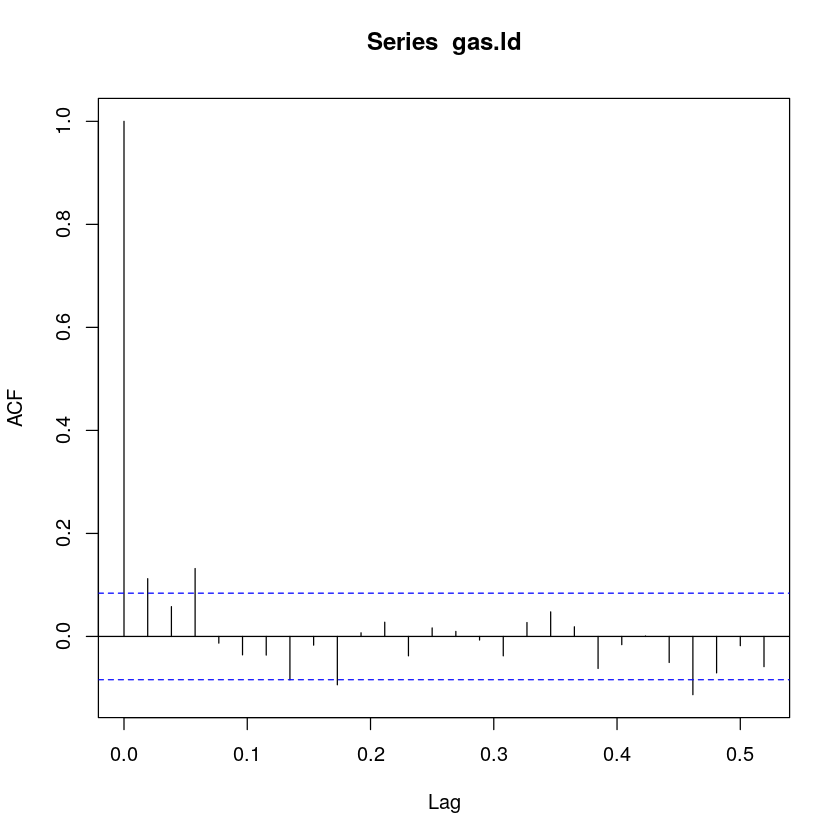

In [38]:
oil.ld = diff(log(oil), lag = 1, differences = 1)
gas.ld = diff(log(gas), lag = 1, differences = 1)
par(mfrow=c(1,1))
plot(gas.ld, main = "Differences of logs of Oil (red; $/barrel) and Gas (black; cents/gal) prices")
lines(oil.ld, col='red')

acf(oil.ld)
acf(gas.ld)

Now we're getting somewhere. These could both be stationary, and the ACF of each drops off pretty quick.

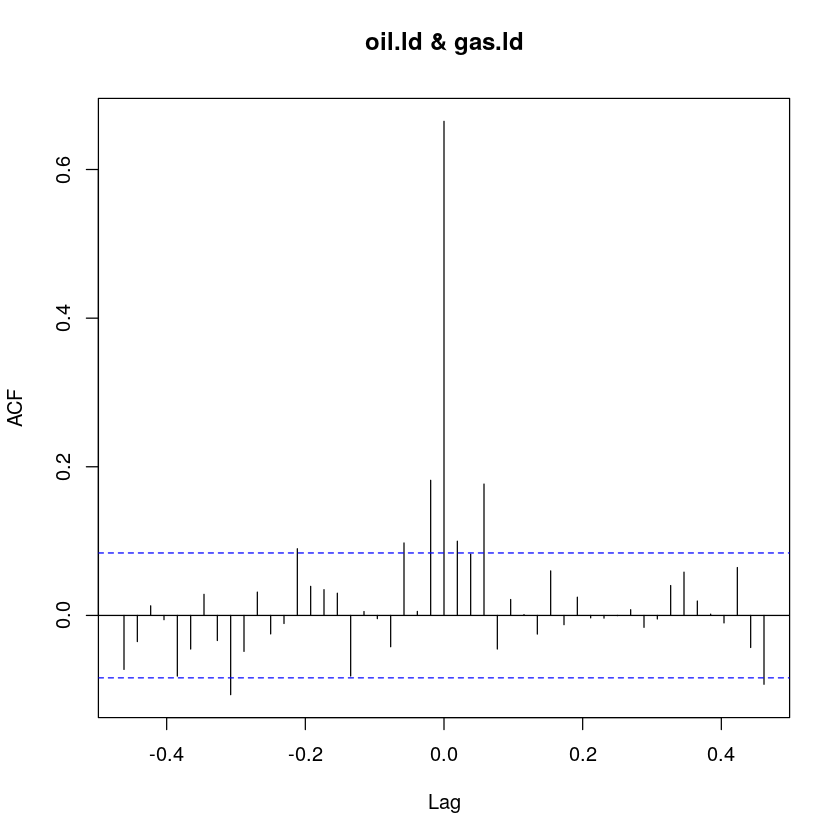

In [40]:
ccf(oil.ld, gas.ld)

There appears to be some positive cross correlation when oil leads gas by a very small amount (i.e., an increase in oil leads quickly to an increase in gas prices), and the cross-correlation when lag=0 is high (as to be expected.) The is also a positive correlation when gas leads oil by a small amount (i.e., an increase in gas price leads to an increase in oil(?).)

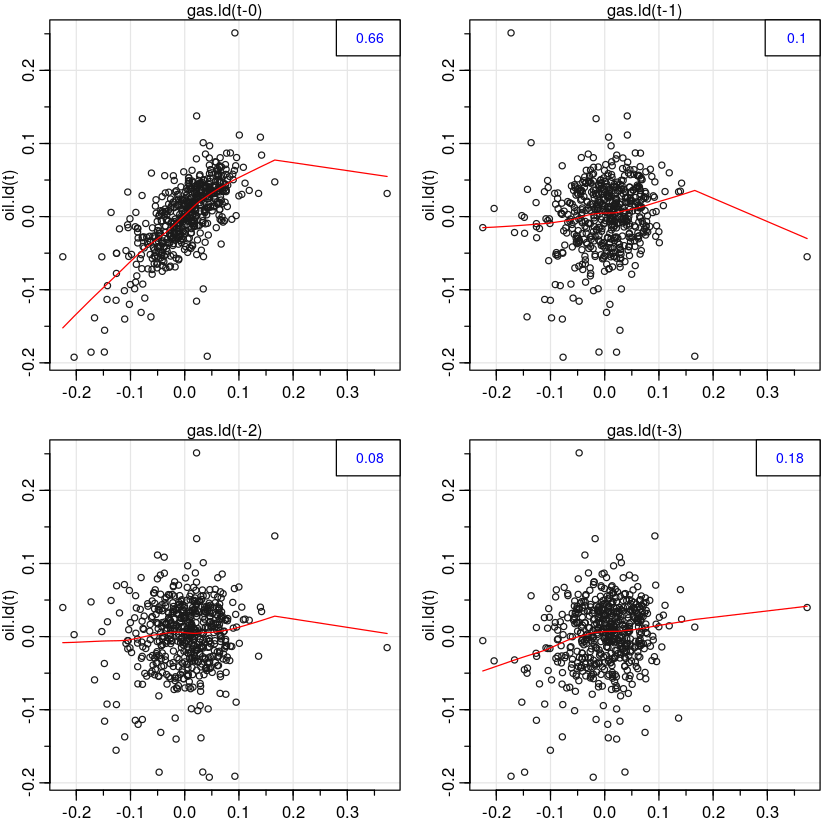

In [42]:
lag2.plot(gas.ld,oil.ld, 3)

There seems to be low correlation, at lags beyond 0, but at 0 it is fairly linear. Lag 3 also exhibts some linearity. There are definitely outliers here. 

In [44]:
poil = diff(log(oil))
pgas = diff(log(gas))
indi = ifelse(poil < 0, 0, 1)
mess = ts.intersect(pgas, poil, poilL = lag(poil,-1), indi)
summary(fit <- lm(pgas~ poil + poilL + indi, data=mess))


Call:
lm(formula = pgas ~ poil + poilL + indi, data = mess)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18451 -0.02161 -0.00038  0.02176  0.34342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006445   0.003464  -1.860  0.06338 .  
poil         0.683127   0.058369  11.704  < 2e-16 ***
poilL        0.111927   0.038554   2.903  0.00385 ** 
indi         0.012368   0.005516   2.242  0.02534 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04169 on 539 degrees of freedom
Multiple R-squared:  0.4563,	Adjusted R-squared:  0.4532 
F-statistic: 150.8 on 3 and 539 DF,  p-value: < 2.2e-16


Given the above regression, the fitted model when there is negative growth is

$$G_t = -0.006445+0.683127*O_t+0.111927*O_{t-1}$$

and when growth is 0 or positive, it is

$$G_t = -0.006445 + 0.012368 + 0.683127*O_t + 0.11927*O_{t-1}.$$

There is some evidence to suggest that the growth rate is different when prices are growing versus falling, but it is only as a $p$-value of $0.025.$ 

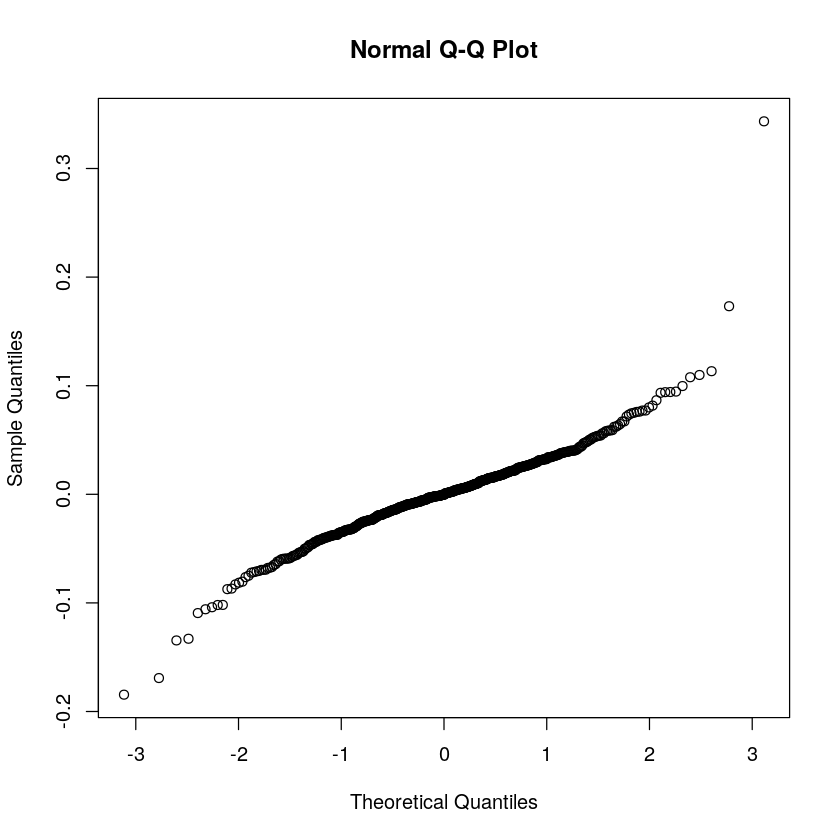

In [49]:
qqnorm(resid(fit))

From the qq-plot, it appears that the residuals are relatively normally distributed, outliers notwithstanding.